# Sensor data acquisition
In this notebook, I will analyse sensor data I logged with my Android phone (Motorola G4 Play) using the [Sensor Fusion app](http://users.isy.liu.se/en/rt/fredrik/app/).You find the code of this project on GitHub at [https://github.com/TimKam/phone-sensors](https://github.com/TimKam/phone-sensors).


## Data generation
You find the data logs in the root repository at ``logs/phone_1_moto_g4_play``.
To facilitate data analyses, I generated the log data as follows:

* The 1st log was created with the phone lying on a table roughly 1.5-2 meters from the next Wifi access point.
* The 2nd 2 meters from the next Wifi access point, changing the phones orientation by very roughly 90 degrees in comparison to the 1st position.
* The 3rd log was created with the phone lying on the ground approximately 5 meters from the next Wifi access point, changing the phones orientation by again very roughly 90 degrees.
* The 4rd log was created while trying to hold the phone still in one hand.
* The 5th log was created while trying to hold the phone still in one hand after doing a couple of pushups (assuming that my hand would shake a bit more then).
* The 6th log was created while **jumping up and down** with the phone in one hand.
* The 7th log was created while **walking** with the phone in one hand.
* The 8th log was created while **running** with the phone in one hand. 

The sensors logged the following type of data:

* acceleration,

* proximity,

* light,

* RSS BLE,

* RSS WIFI,

* RSS cellular network.

## Initial data analysis

Start by importing the required dependencies and loading the data.

In [10]:
import matplotlib.pyplot as plot
from matplotlib.ticker import FormatStrFormatter
import numpy
import pandas
import scipy.stats

# specify max fields per column so pandas can deal with dynamic number of fields per column
names = ['a', 'type', 'c', 'd', 'e', 'f', 'g', 'h']

logs = dict()
logs['still_medium'] = pandas.read_csv(
    '../logs/phone_1_moto_g4_play/sensorLog_20180206T082409_medium_orientation_1.txt',
    sep='\t', lineterminator='\n', names=names)
logs['still_close'] = pandas.read_csv('../logs/phone_1_moto_g4_play/sensorLog_20180206T082700_close_orientation_2.txt',
                                      sep='\t', lineterminator='\n', names=names)
logs['still_far'] = pandas.read_csv('../logs/phone_1_moto_g4_play/sensorLog_20180206T082920_far_orientation_3.txt',
                                    sep='\t', lineterminator='\n', names=names)
logs['still_in_hand'] = pandas.read_csv('../logs/phone_1_moto_g4_play/sensorLog_20180206T090912_in_hand.txt',
                                        sep='\t', lineterminator='\n', names=names)
logs['still_in_hand_exercise'] = pandas.read_csv(
    '../logs/phone_1_moto_g4_play/sensorLog_20180206T091100_in_hand_after_exercise.txt',
    sep='\t', lineterminator='\n', names=names)
logs['jump'] = pandas.read_csv('../logs/phone_1_moto_g4_play/sensorLog_20180206T092528_jumping.txt',
                               sep='\t', lineterminator='\n', names=names)
logs['walk'] = pandas.read_csv('../logs/phone_1_moto_g4_play/sensorLog_20180206T092553_walking.txt',
                               sep='\t', lineterminator='\n', names=names)
logs['run'] = pandas.read_csv('../logs/phone_1_moto_g4_play/sensorLog_20180206T092805_running.txt',
                              sep='\t', lineterminator='\n', names=names)


### GPS
Plot histograms of the GPS measurements (using the ``still_medium`` log), calculate the standard deviations, and test for a normal distribution:

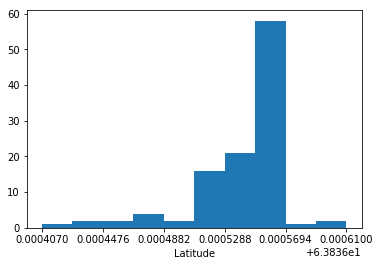

Standard deviation: 3.1123122704543886e-05
Normal distribution: NormaltestResult(statistic=50.20984387062561, pvalue=1.2504632562056814e-11)




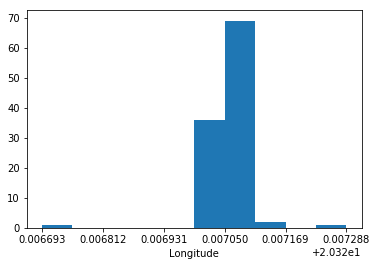

Standard deviation: 4.623078790569411e-05
Normal distribution: NormaltestResult(statistic=124.12036929094378, pvalue=1.1158460041974252e-27)




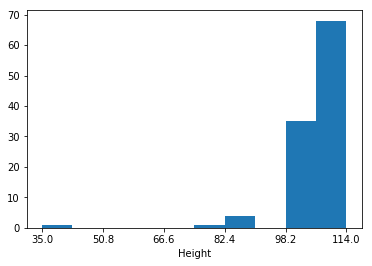

Standard deviation: 8.499860131438579
Normal distribution: NormaltestResult(statistic=163.2702721696085, pvalue=3.518121783538971e-36)




In [2]:
gps_measurements = logs['still_medium'].loc[logs['still_medium']['type'] == 'GPS']
latitudes = gps_measurements['c'].as_matrix().astype(float)
longitudes = gps_measurements['d'].as_matrix().astype(float)
heights = gps_measurements['e'].as_matrix().astype(float)
######################################################################
# Latitudes
######################################################################
# plot histogram
figure, axis = plot.subplots()
counts, bins, patches = axis.hist(latitudes)
axis.set_xticks(bins[0::2])
plot.xlabel('Latitude')
plot.show()
# calculate standard deviation
latitudes_standard_deviation = numpy.std(latitudes)
print('Standard deviation: ' + str(latitudes_standard_deviation))
# test for normal distribution
print('Normal distribution: ' + str(scipy.stats.normaltest(latitudes)) + '\n\n')
######################################################################
# Longitudes
######################################################################
# plot histogram
figure, axis = plot.subplots()
counts, bins, patches = axis.hist(longitudes)
axis.set_xticks(bins[0::2])
plot.xlabel('Longitude')
plot.show()
# calculate standard deviation
longitudes_standard_deviation = numpy.std(longitudes)
print('Standard deviation: ' + str(longitudes_standard_deviation))
# test for normal distribution
print('Normal distribution: ' + str(scipy.stats.normaltest(longitudes)) + '\n\n')
######################################################################
# Heights
######################################################################
# plot histogram
figure, axis = plot.subplots()
counts, bins, patches = axis.hist(heights)
axis.set_xticks(bins[0::2])
plot.xlabel('Height')
plot.show()
# calculate standard deviation
heights_standard_deviation = numpy.std(heights.astype(float))
print('Standard deviation: ' + str(heights_standard_deviation))
# test for normal distribution
print('Normal distribution: ' + str(scipy.stats.normaltest(heights)) + '\n\n')

As one can see, the measurements are too inaccurate to precisely measure the position of the phone accurately (on the meter). The errors are not normally distributed; filtering errors is non-trivial. No strinking outliers could be observed.

### Accelerometer
Plot histograms of the accelerometer measurements (using the logs ``still_medium``, ``still_close``, and ``still_far``/ three different phone orientations), calculate norm vectors, standard variations, and means, and test for normal distributions.




Position 1


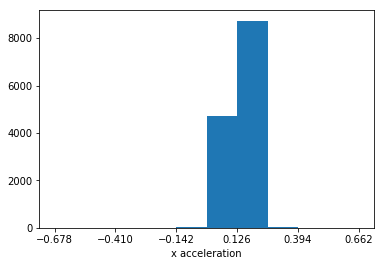

Standard deviation: 0.0243819304608496
Normal distribution: NormaltestResult(statistic=6429.981361339528, pvalue=0.0)
Mean: 0.12748513788917318




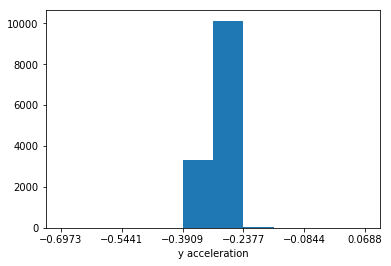

Standard deviation: 0.01991395169811959
Normal distribution: NormaltestResult(statistic=5366.920707329142, pvalue=0.0)
Mean: -0.2984233488828328




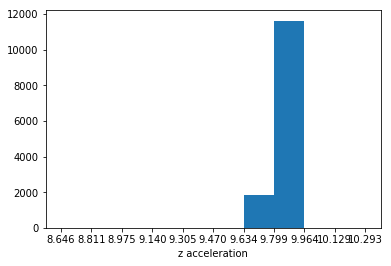

Standard deviation: 0.025106046749755844
Normal distribution: NormaltestResult(statistic=20895.686760140426, pvalue=0.0)
Mean: 9.819290597812383




Position 2


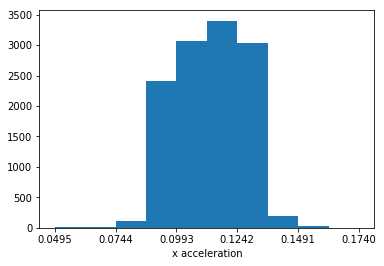

Standard deviation: 0.013500466163351287
Normal distribution: NormaltestResult(statistic=0.8239252539870228, pvalue=0.6623490295641425)
Mean: 0.1131173739473384




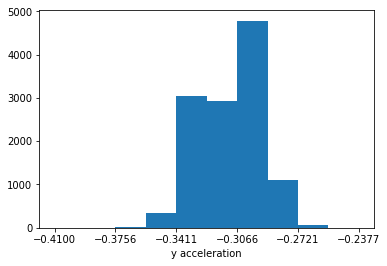

Standard deviation: 0.01542009532566545
Normal distribution: NormaltestResult(statistic=12.44142145754702, pvalue=0.001987831905751757)
Mean: -0.30998490126355266




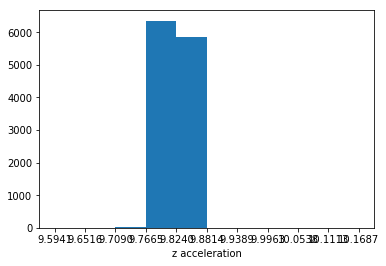

Standard deviation: 0.017577200763926284
Normal distribution: NormaltestResult(statistic=3097.9475036335843, pvalue=0.0)
Mean: 9.818296377068556




Position 3


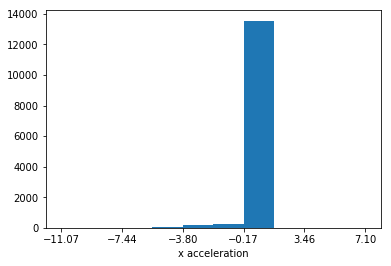

Standard deviation: 0.5304005007505965
Normal distribution: NormaltestResult(statistic=18067.28204409421, pvalue=0.0)
Mean: 0.10304137861396641




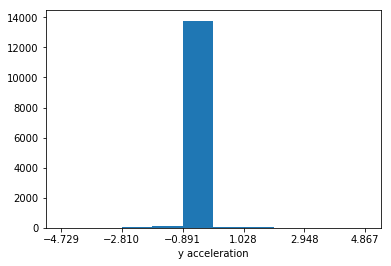

Standard deviation: 0.25070171630613275
Normal distribution: NormaltestResult(statistic=18385.28121315684, pvalue=0.0)
Mean: -0.2752351321614892




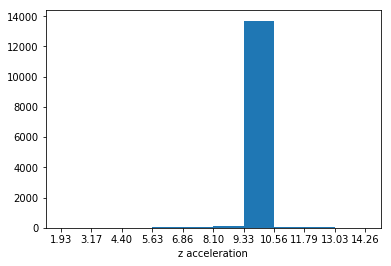

Standard deviation: 0.34738710240417187
Normal distribution: NormaltestResult(statistic=16527.776140648366, pvalue=0.0)
Mean: 9.805790338795557




In [4]:
def plot_and_calculate(x_accs, y_accs, z_accs):
    ######################################################################
    # X
    ######################################################################
    # plot histogram
    figure, axis = plot.subplots()
    counts, bins, patches = axis.hist(x_accs)
    axis.set_xticks(bins[0::2])
    plot.xlabel('x acceleration')
    plot.show()
    # calculate standard deviation
    x_accs_standard_deviation = numpy.std(x_accs)
    print('Standard deviation: ' + str(x_accs_standard_deviation))
    # test for normal distribution
    print('Normal distribution: ' + str(scipy.stats.normaltest(x_accs)))
    x_accs_mean = numpy.mean(x_accs)
    print('Mean: ' + str(x_accs_mean) + '\n\n')
    ######################################################################
    # Y
    ######################################################################
    figure, axis = plot.subplots()
    counts, bins, patches = axis.hist(y_accs)
    axis.set_xticks(bins[0::2])
    plot.xlabel('y acceleration')
    plot.show()
    # calculate standard deviation
    y_accs_standard_deviation = numpy.std(y_accs)
    print('Standard deviation: ' + str(y_accs_standard_deviation))
    # test for normal distribution
    print('Normal distribution: ' + str(scipy.stats.normaltest(y_accs)))
    y_accs_mean = numpy.mean(y_accs)
    print('Mean: ' + str(y_accs_mean) + '\n\n')
    ######################################################################
    # Z
    ######################################################################
    figure, axis = plot.subplots()
    counts, bins, patches = axis.hist(z_accs)
    axis.set_xticks(bins)
    plot.xlabel('z acceleration')
    plot.show()
    # calculate standard deviation
    z_accs_standard_deviation = numpy.std(z_accs)
    print('Standard deviation: ' + str(z_accs_standard_deviation))
    # test for normal distribution
    print('Normal distribution: ' + str(scipy.stats.normaltest(z_accs)))
    z_accs_mean = numpy.mean(z_accs)
    print('Mean: ' + str(z_accs_mean) + '\n\n')
    ############################################

######################################################################
# Position 1
######################################################################
print('\n\n' + 'Position 1')
acc_measurements_pos1 = logs['still_medium'].loc[logs['still_medium']['type'] == 'ACC']
x_accs_pos1 = acc_measurements_pos1['c'].astype(float)
y_accs_pos1 = acc_measurements_pos1['d'].astype(float)
z_accs_pos1 = acc_measurements_pos1['e'].astype(float)
plot_and_calculate(x_accs_pos1, y_accs_pos1, z_accs_pos1)
######################################################################
# Position 2
######################################################################
print('\n\n' + 'Position 2')
acc_measurements_pos1 = logs['still_close'].loc[logs['still_close']['type'] == 'ACC']
x_accs_pos2 = acc_measurements_pos1['c'].astype(float)
y_accs_pos2 = acc_measurements_pos1['d'].astype(float)
z_accs_pos2 = acc_measurements_pos1['e'].astype(float)
plot_and_calculate(x_accs_pos2, y_accs_pos2, z_accs_pos2)
######################################################################
# Position 3
######################################################################
print('\n\n' + 'Position 3')
acc_measurements_pos1 = logs['still_far'].loc[logs['still_far']['type'] == 'ACC']
x_accs_pos2 = acc_measurements_pos1['c'].astype(float)
y_accs_pos2 = acc_measurements_pos1['d'].astype(float)
z_accs_pos2 = acc_measurements_pos1['e'].astype(float)
plot_and_calculate(x_accs_pos2, y_accs_pos2, z_accs_pos2)



The observed means of the gravity vectors are slightly lower than the expected one for Umeå at a location roughly 100 meters above sealevel. The variations are not normally distributed. Discretization effects can be observed.

### Gyroscope
The phone I used (Motorola 4G Play) does not have a gyroscope.

### Wifi RSSI
Plot histograms of the Wifi RSSI measurements (using the logs ``still_medium``, ``still_close``, and ``still_far``) and calculate standard deviations and means.
**Note:** In the ``still_medium`` and ``still_far`` logs the signal is somewhat obstructed by walls.


Close distance (some centimeters)


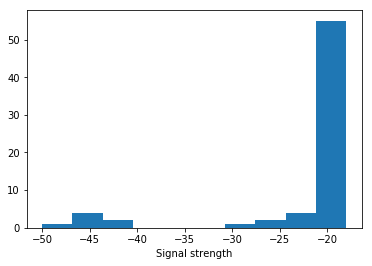

Standard deviation: 7.953947473002107
Mean: -22.26086956521739


Medium distance (1.5-2 meters)


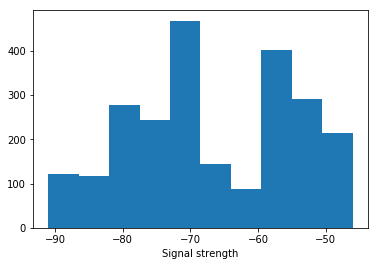

Standard deviation: 11.882524911684367
Mean: -66.96407438715131


Far distance (approx. 5 meters)


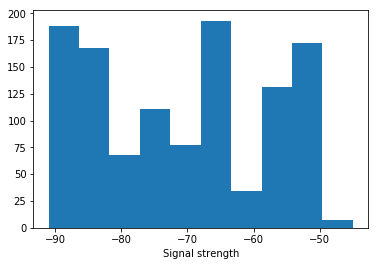

Standard deviation: 12.9138904402061
Mean: -70.76414273281114


In [130]:
router = 'TeliaGateway30-91-8F-2D-37-33'
wifi_measurements_close = logs['still_close'].loc[logs['still_close']['type'] == 'RSSWIFI'].loc[logs['still_close']['d'] == router]
wifi_measurements_medium = logs['still_medium'].loc[logs['still_medium']['type'] == 'RSSWIFI']
wifi_measurements_far = logs['still_far'].loc[logs['still_far']['type'] == 'RSSWIFI']
signal_strength_close = wifi_measurements_close['f'].as_matrix().astype(float)
signal_strength_medium = wifi_measurements_medium['f'].as_matrix().astype(float)
signal_strength_far= wifi_measurements_far['f'].as_matrix().astype(float)
######################################################################
# Close to access point
######################################################################
# plot histogram
figure, axis = plot.subplots()
counts, bins, patches = axis.hist(signal_strength_close)
plot.xlabel('Signal strength')
print('Close distance (some centimeters)')
plot.show()
# calculate standard deviation
signal_strength_standard_deviation_close = numpy.std(signal_strength_close)
print('Standard deviation: ' + str(signal_strength_standard_deviation_close))
# calculate mean
signal_strength_mean_close = numpy.mean(signal_strength_close)
print('Mean: ' + str(signal_strength_mean_close) + '\n\n')
######################################################################
# Further away from to access point
######################################################################
# plot histogram
figure, axis = plot.subplots()
counts, bins, patches = axis.hist(signal_strength_medium)
plot.xlabel('Signal strength')
print('Medium distance (1.5-2 meters)')
plot.show()
# calculate standard deviation
signal_strength_standard_deviation_medium = numpy.std(signal_strength_medium)
print('Standard deviation: ' + str(signal_strength_standard_deviation_medium))
signal_strength_mean_medium = numpy.mean(signal_strength_medium)
print('Mean: ' + str(signal_strength_mean_medium) + '\n\n')
######################################################################
# Even further away from to access point
######################################################################
# plot histogram
figure, axis = plot.subplots()
counts, bins, patches = axis.hist(signal_strength_far)
plot.xlabel('Signal strength')
print('Far distance (approx. 5 meters)')
plot.show()
# calculate standard deviation
signal_strength_standard_deviation_far = numpy.std(signal_strength_far)
print('Standard deviation: ' + str(signal_strength_standard_deviation_far))
# calculate mean
signal_strength_mean_far = numpy.mean(signal_strength_far)
print('Mean: ' + str(signal_strength_mean_far))

Considering that the outliers in the "close to access point" logs can be removed with little effort, it can be concluded that using the signal strenghts to determine the distance from the wifi access point is more practicable the closer the device is to the access point. Given our measurements, distinguishing between approx. 1.5-2 and approx. 5 meters from the access point is already challenging, at least if the data is relatively small (example use case: locating a moving object in real time).

**Note:** In the *further away* measurements, the Wifi signal is to some extend obstructed by walls. This could potentially confound the findings. 

## Zero gravity app
As an example for real time data analysis, an app that measures 'zero gravity' periods--that is periods during which the following condition is true:

$$\sqrt{a{x}^2 + a^2{y} + a{z}^2} < 0.1ms^{-2}$$


The app determines the longest 'zero gravity' period by calculating every millisecond, if the current period is 'zero gravity' and logs the timestamp deltas between the start and the end of continuous 'zero gravity' measurements. If the ``lastPeriod`` variable holds a higher value than the ``longestPeriod``, the ``longestPeriod`` variable is updated and displayed to the user.

**Note:** The app doesn't save the result to disk, so it always displays the longest 'zero gravity' period of the current run.

Below you find the code (Kotlin) of the app's main activity (without imports):

```
package se.umu.timotheuskampik.zerogravity

import android.content.Context
import android.hardware.Sensor
import android.hardware.SensorEvent
import android.hardware.SensorEventListener
import android.hardware.SensorManager
import android.support.v7.app.AppCompatActivity
import android.os.Bundle
import kotlinx.android.synthetic.main.activity_main.*

class MainActivity : AppCompatActivity(), SensorEventListener {

    private var longestPeriodLength: Long = 0
    private var startTimeCurrentPeriod: Long? = null

    private lateinit var sensorManager : SensorManager

    override fun onCreate(savedInstanceState: Bundle?) {
        super.onCreate(savedInstanceState)
        if(savedInstanceState == null) {
            setContentView(R.layout.activity_main)
            // set up sensor listener for accelerometer
            sensorManager = getSystemService(Context.SENSOR_SERVICE)
                    as SensorManager
            sensorManager.registerListener(
                    this,
                    sensorManager.getDefaultSensor(Sensor.TYPE_ACCELEROMETER),
                    SensorManager.SENSOR_DELAY_NORMAL
            )
        }
    }

    override fun onSensorChanged(event: SensorEvent?) {
        val isZeroGravity = checkZeroGravity(event!!)
        if(isZeroGravity && startTimeCurrentPeriod == null) {
            // start new zero gravity period
            startTimeCurrentPeriod = event!!.timestamp

        } else if(!isZeroGravity && startTimeCurrentPeriod != null) {
            // end current zero gravity period
            // calculate difference between start and current timestamp
            val currentPeriodLength =
                    (event.timestamp - startTimeCurrentPeriod!!)
            startTimeCurrentPeriod = null
            last.text =
                    "Last zero gravity period:" +
                            "${currentPeriodLength.toString()} nanoseconds"
            if(currentPeriodLength > longestPeriodLength) {
                longestPeriodLength = currentPeriodLength
                longest.text =
                        "Longest zero gravity period:" +
                                "${longestPeriodLength.toString()} nanoseconds"
            }
        }
    }

    override fun onAccuracyChanged(p0: Sensor?, p1: Int) {
        // Do nothing
    }

    private fun checkZeroGravity(event: SensorEvent): Boolean {
        val x = event!!.values[0].toDouble()
        val y = event!!.values[1].toDouble()
        val z = event!!.values[2].toDouble()

        if(Math.sqrt(Math.pow(x, 2.0) +
                Math.pow(y, 2.0) +
                Math.pow(z, 2.0))
                < 0.1) {
            return true
        }
        return false
    }
}

```
You find the whole source code of the app on GitHub at [https://github.com/TimKam/phone-sensors/tree/master/apps/zero_gravity](https://github.com/TimKam/phone-sensors/tree/master/apps/zero_gravity)
After a couple of tests (simply throwing the phone into the air), the longest 'zero gravity' period that could be achieved was 924 nanoseconds.

**Note**: In this context, a *zero gravity period* is the time of the device in free fall, as the sensor data is not cleared from gravitational forces, as could be done by logging measurements from the phone's gravity sensor and implementing a *high-pass* filter as described in the android developer documentation at [https://developer.android.com/reference/android/hardware/SensorEvent.html#values](https://developer.android.com/reference/android/hardware/SensorEvent.html#values).

## Tremor measuring app
To create a *tremor measuring app*, I first compared the means and standard deviations of the following logs:

* ``still_medium``,

* ``still_in_hand``,

* ``still_in_hand_excercise``.

Out of conveniance (I could re-use a function I've written above), I also plot the histogram and test for a normal distribution.


Lying still on desk


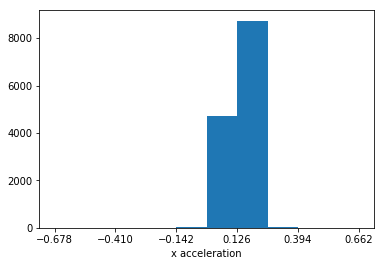

Standard deviation: 0.0243819304608496
Normal distribution: NormaltestResult(statistic=6429.981361339528, pvalue=0.0)
Mean: 0.12748513788917318




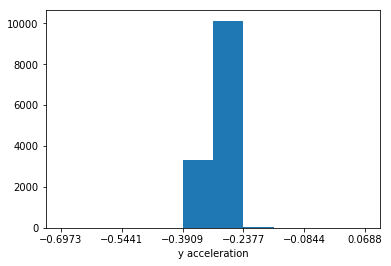

Standard deviation: 0.01991395169811959
Normal distribution: NormaltestResult(statistic=5366.920707329142, pvalue=0.0)
Mean: -0.2984233488828328




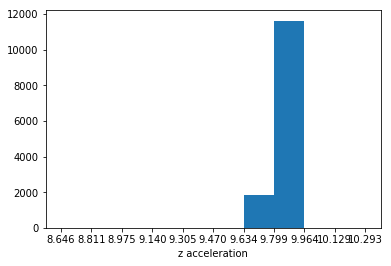

Standard deviation: 0.025106046749755844
Normal distribution: NormaltestResult(statistic=20895.686760140426, pvalue=0.0)
Mean: 9.819290597812383




 Holding as still as possible in hand


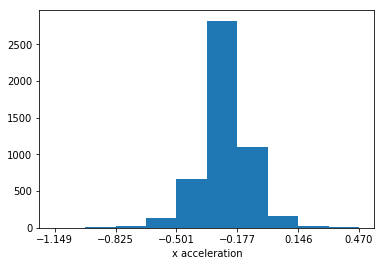

Standard deviation: 0.1351583317960834
Normal distribution: NormaltestResult(statistic=546.6596844166197, pvalue=1.9695081824086497e-119)
Mean: -0.24284244150578127




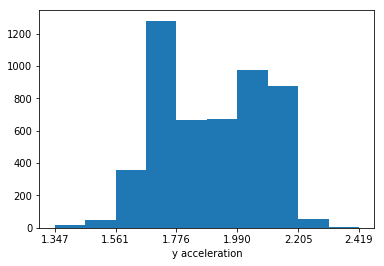

Standard deviation: 0.18256020108752413
Normal distribution: NormaltestResult(statistic=4633.429658294143, pvalue=0.0)


Mean: 1.8999659031129976




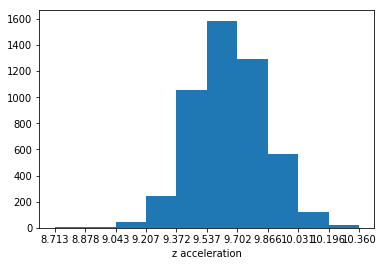

Standard deviation: 0.19597444048377477
Normal distribution: NormaltestResult(statistic=25.08966591655999, pvalue=3.5632662125795002e-06)
Mean: 9.659452746310896




 Holding as still as possible in hand after exercise


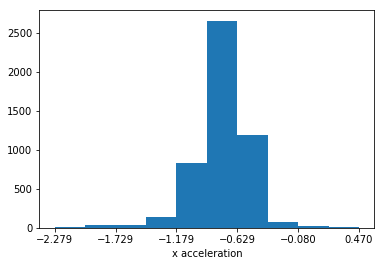

Standard deviation: 0.24444710726184787
Normal distribution: NormaltestResult(statistic=1201.8224892678147, pvalue=1.0655218056614903e-261)
Mean: -0.7647791088620315




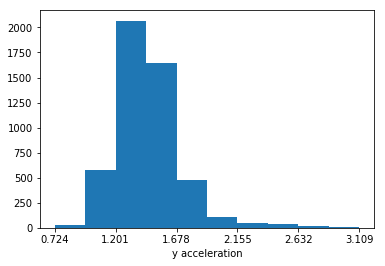

Standard deviation: 0.26330292840016506
Normal distribution: NormaltestResult(statistic=1773.7268556113095, pvalue=0.0)
Mean: 1.4539483400757574




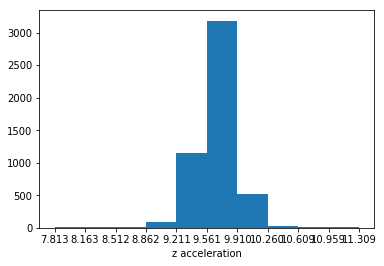

Standard deviation: 0.23349622310456264
Normal distribution: NormaltestResult(statistic=1148.5274998457967, pvalue=3.984944263672864e-250)
Mean: 9.681890214015153




In [13]:
######################################################################
print('Lying still on desk')
######################################################################
acc_measurements_pos1 = logs['still_medium'].loc[logs['still_medium']['type'] == 'ACC']
x_accs_pos1 = acc_measurements_pos1['c'].astype(float)
y_accs_pos1 = acc_measurements_pos1['d'].astype(float)
z_accs_pos1 = acc_measurements_pos1['e'].astype(float)
plot_and_calculate(x_accs_pos1, y_accs_pos1, z_accs_pos1)
######################################################################
print('\n\n Holding as still as possible in hand')
######################################################################
acc_measurements_pos1 = logs['still_in_hand'].loc[logs['still_in_hand']['type'] == 'ACC']
x_accs_pos1 = acc_measurements_pos1['c'].astype(float)
y_accs_pos1 = acc_measurements_pos1['d'].astype(float)
z_accs_pos1 = acc_measurements_pos1['e'].astype(float)
plot_and_calculate(x_accs_pos1, y_accs_pos1, z_accs_pos1)
######################################################################
print('\n\n Holding as still as possible in hand after exercise')
######################################################################
acc_measurements_pos1 = logs['still_in_hand_exercise'].loc[logs['still_in_hand_exercise']['type'] == 'ACC']
x_accs_pos1 = acc_measurements_pos1['c'].astype(float)
y_accs_pos1 = acc_measurements_pos1['d'].astype(float)
z_accs_pos1 = acc_measurements_pos1['e'].astype(float)
plot_and_calculate(x_accs_pos1, y_accs_pos1, z_accs_pos1)

Based on our observations, we conclude:

*The higher the tremor, the higher the standard deviation of all vectors.* 

In our tremour measuring app, we use the standard deviation as a factor that impacts the background color of our app (no tremor: green; the more tremor, the more 'redish' it gets). Below you find the (Kotlin) code of the main activity.

```
class MainActivity : AppCompatActivity(), SensorEventListener {

    private lateinit var sensorManager : SensorManager

    private var windowStartTime : Long? = null
    private var measurementsX = arrayListOf<Double>()
    private var measurementsY = arrayListOf<Double>()
    private var measurementsZ = arrayListOf<Double>()

    override fun onCreate(savedInstanceState: Bundle?) {
        super.onCreate(savedInstanceState)
        if(savedInstanceState == null) {
            setContentView(R.layout.activity_main)
            container.setBackgroundColor(Color.rgb(0,255,0))
            container.invalidate()
            // set up sensor listener for accelerometer
            sensorManager = getSystemService(Context.SENSOR_SERVICE)
                    as SensorManager
            sensorManager.registerListener(
                    this,
                    sensorManager.getDefaultSensor(Sensor.TYPE_ACCELEROMETER),
                    SensorManager.SENSOR_DELAY_NORMAL
            )
        }
    }

    override fun onSensorChanged(event: SensorEvent?) {
        measurementsX.add(event!!.values[0].toDouble())
        measurementsY.add(event!!.values[1].toDouble())
        measurementsZ.add(event!!.values[2].toDouble())
        if(windowStartTime == null) {
            windowStartTime = event!!.timestamp
        } else if(event!!.timestamp - windowStartTime!! > 1000000000) {
            windowStartTime = event!!.timestamp
            val populationVarianceX = Math.ceil(
                    StatUtils.populationVariance(measurementsX.toDoubleArray()))
            val populationVarianceY = Math.ceil(
                    StatUtils.populationVariance(measurementsY.toDoubleArray()))
            val populationVarianceZ = Math.ceil(
                    StatUtils.populationVariance(measurementsZ.toDoubleArray()))
            var impactFactor =
                    populationVarianceX +
                    populationVarianceY +
                    populationVarianceZ
            if(impactFactor < 1) {
                impactFactor = 1.0
            }
            val green = 255/impactFactor
            val red = 255/(255/impactFactor)
            container.setBackgroundColor(
                    Color.rgb(red.toInt(), green.toInt(),0))
            measurementsX.clear()
            measurementsY.clear()
            measurementsZ.clear()

        }
    }

    override fun onAccuracyChanged(p0: Sensor?, p1: Int) {
        // Do nothing
    }

}
```

You find all of the code of the app on GitHub at [https://github.com/TimKam/phone-sensors/tree/master/apps/Tremormeasuring](https://github.com/TimKam/phone-sensors/tree/master/apps/Tremormeasuring). Note that the dynamic color calculation function is not ooptimized to best detect differences in 'normal' human hand tremor. To detect differences in tremor between individuals, it would be helpful to obtain a larger dataset (multiple persons and phones).

## Activity detector
To create an *activity*, I first compared the means and standard deviations of the following logs:

* ``still_in_hand``,

* ``jump``,

* ``walk``,

* ``run``.

Out of convenience (I could re-use a function I've written above), I also plot the histogram and test for a normal distribution.

Lying still in hand


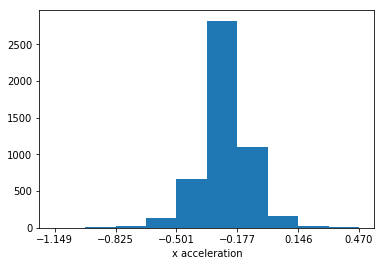

Standard deviation: 0.1351583317960834
Normal distribution: NormaltestResult(statistic=546.6596844166197, pvalue=1.9695081824086497e-119)
Mean: -0.24284244150578127




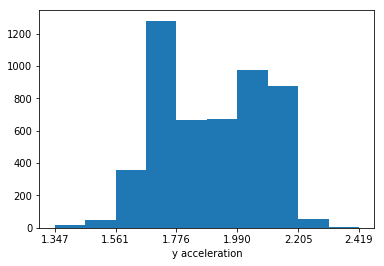

Standard deviation: 0.18256020108752413
Normal distribution: NormaltestResult(statistic=4633.429658294143, pvalue=0.0)
Mean: 1.8999659031129976




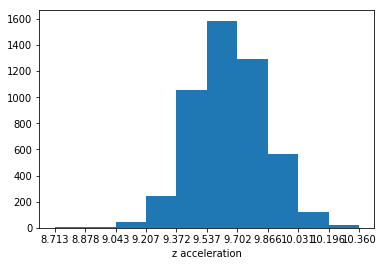

Standard deviation: 0.19597444048377477
Normal distribution: NormaltestResult(statistic=25.08966591655999, pvalue=3.5632662125795002e-06)
Mean: 9.659452746310896




 Jump


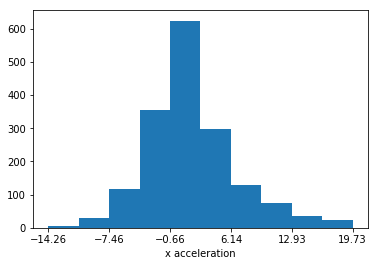

Standard deviation: 4.956711528114926
Normal distribution: NormaltestResult(statistic=166.06502405704663, pvalue=8.698376614861159e-37)
Mean: 1.711053475805549




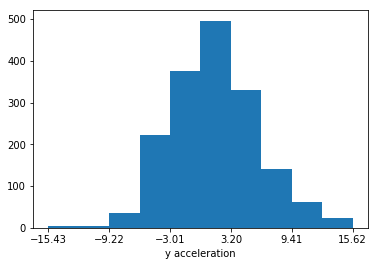

Standard deviation: 4.435041892857127
Normal distribution: NormaltestResult(statistic=25.18028649211898, pvalue=3.40541670318871e-06)
Mean: 1.4442162795799292




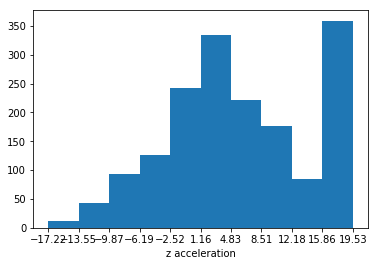

Standard deviation: 8.955185232787617
Normal distribution: NormaltestResult(statistic=158.4401168481134, pvalue=3.937003223511777e-35)
Mean: 6.032420014392562




 Walk


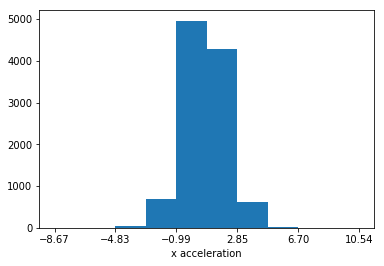

Standard deviation: 1.306966548210324
Normal distribution: NormaltestResult(statistic=415.28276468251914, pvalue=6.644976270969121e-91)
Mean: 0.8539842946950641




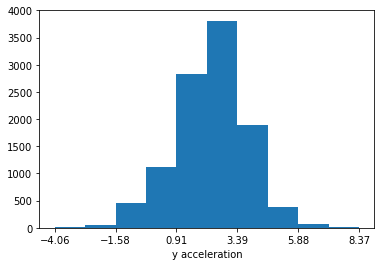

Standard deviation: 1.4514589828887674
Normal distribution: NormaltestResult(statistic=231.68527423854522, pvalue=4.8998403523057985e-51)
Mean: 2.335420876583798




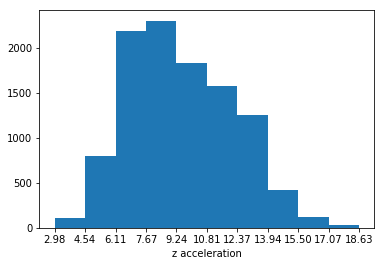

Standard deviation: 2.6762544036050593
Normal distribution: NormaltestResult(statistic=417.42686335939436, pvalue=2.274617218770735e-91)
Mean: 9.508685973766013




 Run


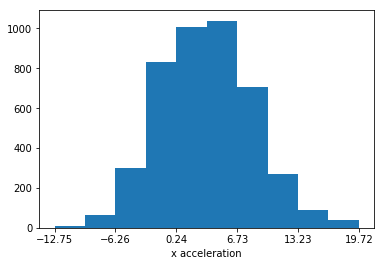

Standard deviation: 4.939696856674056
Normal distribution: NormaltestResult(statistic=38.09817476808839, pvalue=5.334410878601726e-09)
Mean: 3.488829168989703




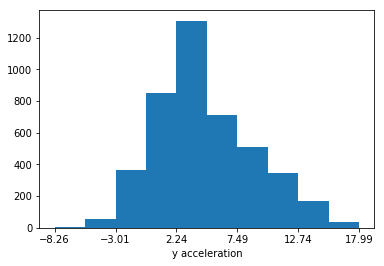

Standard deviation: 4.199225614118916
Normal distribution: NormaltestResult(statistic=163.244574964113, pvalue=3.563616377861392e-36)
Mean: 4.655095962070421




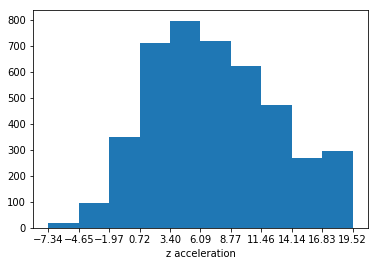

Standard deviation: 5.597411162765811
Normal distribution: NormaltestResult(statistic=154.26769310388636, pvalue=3.1709987769397195e-34)
Mean: 7.353096040683384




In [17]:
######################################################################
print('Lying still in hand')
######################################################################
acc_measurements_pos1 = logs['still_in_hand'].loc[logs['still_in_hand']['type'] == 'ACC']
x_accs_pos1 = acc_measurements_pos1['c'].astype(float)
y_accs_pos1 = acc_measurements_pos1['d'].astype(float)
z_accs_pos1 = acc_measurements_pos1['e'].astype(float)
plot_and_calculate(x_accs_pos1, y_accs_pos1, z_accs_pos1)
######################################################################
print('\n\n Jump')
######################################################################
acc_measurements_pos1 = logs['jump'].loc[logs['jump']['type'] == 'ACC']
x_accs_pos1 = acc_measurements_pos1['c'].astype(float)
y_accs_pos1 = acc_measurements_pos1['d'].astype(float)
z_accs_pos1 = acc_measurements_pos1['e'].astype(float)
plot_and_calculate(x_accs_pos1, y_accs_pos1, z_accs_pos1)
######################################################################
print('\n\n Walk')
######################################################################
acc_measurements_pos1 = logs['walk'].loc[logs['walk']['type'] == 'ACC']
x_accs_pos1 = acc_measurements_pos1['c'].astype(float)
y_accs_pos1 = acc_measurements_pos1['d'].astype(float)
z_accs_pos1 = acc_measurements_pos1['e'].astype(float)
plot_and_calculate(x_accs_pos1, y_accs_pos1, z_accs_pos1)
######################################################################
print('\n\n Run')
######################################################################
acc_measurements_pos1 = logs['run'].loc[logs['run']['type'] == 'ACC']
x_accs_pos1 = acc_measurements_pos1['c'].astype(float)
y_accs_pos1 = acc_measurements_pos1['d'].astype(float)
z_accs_pos1 = acc_measurements_pos1['e'].astype(float)
plot_and_calculate(x_accs_pos1, y_accs_pos1, z_accs_pos1)

Considering the measurements, I defined the following standard deviation tresholds for the different activity types:

*still* to *walking*:

z-axis acceleration: $$0.35ms^{-2}$$

*walking* to *running*:

z-axis acceleration: $$4ms^{-2}$$

*running* to *jumping*:

z-axis acceleration: $$7ms^{-2}$$

In addition, I set a necessary condition for  the standard deviation of x- and y-axis acceleration for all *activities* (everything but 'still') to $$0.5ms^{-2}$$.


In the real-time application, the standard deviation of the z-axis acceleration will be calculated for approximately half-second long intervals to deterime the current state (either *still*, *walking*, *running*, or *jumping*). Below you find the (Kotlin) code of the app's main activity.